<a href="https://colab.research.google.com/github/victorbuenog/Flapper_Chain/blob/main/flapper_chain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
! git clone https://github.com/victorbuenog/Flapper_Chain
import os
os.chdir("Flapper_Chain")

fatal: destination path 'Flapper_Chain' already exists and is not an empty directory.


In [10]:
# Multi-agent
from flapper import InitialCondition, MultiAgentTrainer, Logger
import matplotlib.pyplot as plt
import numpy as np
import torch

# Initialize multi-agent trainer
a_n_followers = 2
ma_trainer = MultiAgentTrainer(n_followers=a_n_followers, passive=True, noise=0.)

# Train from scratch (example). Increase episodes to 1000+ to auto-save checkpoints.
# icfn = lambda: InitialCondition().random(['f2','distance','A2'])
# history = ma_trainer.train(initial_condition_fn=icfn, episodes=2000, sequential=False, dynamic=False)

# Multi-agent: load trained policies for each follower (example: latest checkpoint if available)
ma_trainer.load_models(clone=1, path="Policies/PPO_Flappers_Original.pth")
f2 = 1.1
fig = ma_trainer.plot_distance(InitialCondition(distance=40, f2=f2, A2=2.), max_timesteps=500)
fig.savefig(f"Figures/distance_n_{a_n_followers}_original_f_{f2}_passive.eps",format='eps')
fig.savefig(f"Figures/distance_n_{a_n_followers}_original_f_{f2}_passive.svg",format='svg')

Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


GPU is not available. Using CPU.


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


Cloned policy from agent 1 to all agents from: Policies/PPO_Flappers_Original.pth


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


FileNotFoundError: [Errno 2] No such file or directory: 'Figures/distance_n_2_original_f_1.1_passive.eps'

ValueError: all input arrays must have the same shape

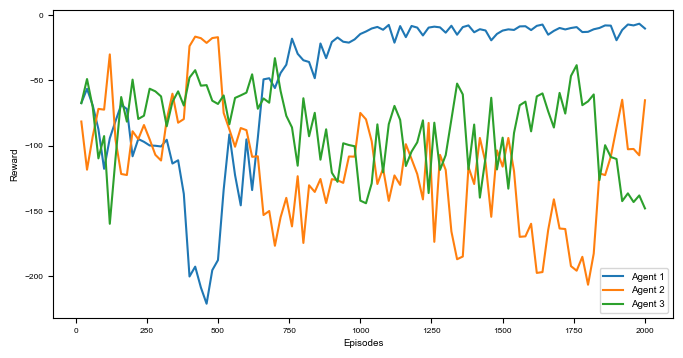

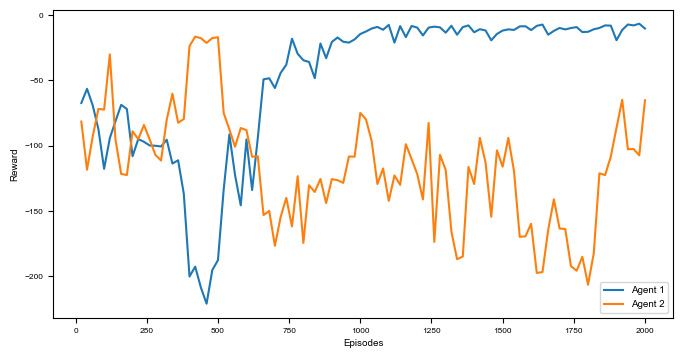

In [ ]:
# Plot latest per-agent curves from Logs/ for sequential runs
Logger.plot_training("Logs", n_followers=3, sequential=False)

# Plot specific agents for sequential logs
Logger.plot_training("Logs", agent_idx=[1,2], sequential=False)

# Average across sequential runs for agent 1
Logger.plot_average_training("Logs", agent_idx=1, sequential=False)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


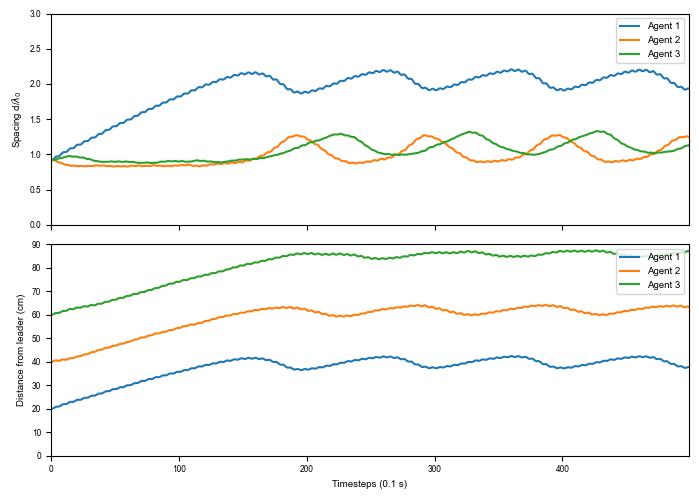

In [ ]:
# Plot distances
fig  = ma_trainer.plot_distance(InitialCondition(distance=20, f2=0.9, A2=2.3), max_timesteps=500)
fig.savefig(f"Figures/distance_n_{a_n_followers}.eps",format='eps' )

In [ ]:
# Multi-agent: visualize policy map for each agent
for agent_idx in range(1, a_n_followers+1):
    fig = ma_trainer.visualize_policy_agent(agent_idx, resolutions=[12, 12, 6])
    plt.show(fig)



In [ ]:
# Multi-agent: create a chain rollout video
ma_trainer.create_video(ic=InitialCondition(distance=20, f2=1.0, A2=2.0), time=10)



In [ ]:
# Multi-agent: distance plots for Agent 1 across parameter sweeps
from flapper import Logger

freq = np.linspace(0.5, 1.5, 5)
amps = np.linspace(1., 4., 5)
dists = np.linspace(15, 60, 5)

# Distance vs time for varying A2 at fixed (d,f2)
fig = ma_trainer.plot_distance_agent(
    initial_conditions=(InitialCondition(distance=20, f2=1., A2=a) for a in amps),
    agent_idx=0,
    max_timesteps=200
)
plt.show(fig)

# Stability test for Agent 1
# stability = ma_trainer.test_all_agent(agent_idx=0, n=10, legend=True, save_figures=False)
# plt.show(stability)

